# Session 6-2: Human Population Data - OpenStreetMap

![ntl](./assets/osm.jpg) 

In this session, we will continue learning about human data that is useful for sustainability research. We will focus on [OpenStreetMap](https://www.openstreetmap.org/#map=5/38.007/-95.844), a global open-source mapping effort that relies on citizen science [volunteered geographic information (VGI)](https://www.usgs.gov/center-of-excellence-for-geospatial-information-science-%28cegis%29/volunteered-geographic-information#:~:text=Volunteered%20geographic%20information%2C%20that%20is,to%20enhance%20their%20geospatial%20databases.). OSM is akin to Wikipedia - a massive effort to college, validate, and store the world's geographic information. It backed by major corporations like Microsoft and TomTom, as well as individuals around the world. Some [ten million people](https://planet.openstreetmap.org/statistics/data_stats.html) use OSM directly and OSM data is use by Facebook, Amazon, Tesla, and Stava, along with many other companies around the world. Indeed, OSM is truly a powerhouse as a GIS platform. <br>

<img src="./assets/OSM_data_primitives.png" alt="osm data" width="500"/>


OSM uses topological data structure with four core data primatives (e.g. highest level of organization):
1. _Nodes_ (e.g. points) with latitude and longitude coordinates.
2. _Ways_ (e.d. lines and polygons), which are ordered lists of _nodes_.
3. _Relations_, which are ordered lists of _nodes_, _ways_ and _relations_. Together, these are called _members_ and are used to show the relationship between _nodes_ and _ways_. 
4. _Tags_ are key-value pairs that create metadata about OSM map objects. Tags are defined by OSM for common usage. For example, `place` has values such as `city` or `country` (read more [here](https://wiki.openstreetmap.org/wiki/Tag:place%3Dcity). 

<p style="height:1pt"> </p>

<div class="boxhead2">
    Session Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 Introduction to <span class="codeb">OpenStreetMap Data  with OSMnx </span> </li>
    <ul class="b">
        <li> Leaflet Overview </li>
        <li> OSM Places </li>
        <li> Building Foot Prints </li>
        <li> On Your Own: Apartments </li>
        <li> On Your Own: Bikepaths </li>
    </ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
We will work through this notebook together. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. 

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

### Leaflet and OpenStreetMap
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

This is not a web mapping course. But it is important to know the basics of importing an interactive map into a Jupyter Notebook. To do this, we will use [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/index.html), an interactive Juypter widget and even your own web map (see our [Global Waste Water](https://www.globalwastewatermodel.com/webmap.html) as an example, built actually in R using Leaflet, but you can build the same thing in Python).

Let's get started!

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [1]:
# Import Dependencies
from ipyleaflet import Map, basemaps, basemap_to_tiles
from ipyleaflet import LayersControl
from ipyleaflet import SearchControl, Marker, AwesomeIcon

In [2]:
# Set Latitude and Longitude + Zoom Leve 
center = [45.7, 249] 
zoom = 11

Map(basemap = basemaps.OpenStreetMap.Mapnik, center = center, zoom = zoom)

Map(center=[45.7, 249], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

While this tutorial is focused on OSM, we can also load other [basemaps](https://ipyleaflet.readthedocs.io/en/latest/map_and_basemaps/basemaps.html) into our Leaflet Map and there are a ton of features you can add to your Leaflet map. We'll come back to the Leaflet maps later, but check out the example of different basemaps and the search bar you can add. FYI: On the left of the panel, you will see a layers icon.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [3]:
# OSM Basemap
mapnik = basemap_to_tiles(basemaps.OpenStreetMap.Mapnik)
mapnik.base = True

# MODIS Terra True Color 
modis = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR)
modis.base = True

# ESRI WorldImagery 
esri = basemap_to_tiles(basemaps.Esri.WorldImagery)
esri.base = True

# All Strava
strava = basemap_to_tiles(basemaps.Strava.All)
strava.base = True

# Set the Layers we want in our map 
layers_list = [mapnik, modis, esri, strava]
m = Map(layers = layers_list, center = center, zoom = 7) # Note: not all basemaps can zoom at fine-scales

# use the LayersControl to switch basemaps
m.add(LayersControl())

# Create a green marker
marker = Marker(icon=AwesomeIcon(name="check", marker_color='green', icon_color='darkgreen'))

# Add SearchControl from OSM database 
m.add(SearchControl(
  position="topleft",
  url='https://nominatim.openstreetmap.org/search?format=json&q={s}',
  zoom=5,
  marker=marker
))

m

Map(center=[45.7, 249], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

### Accessing OSM Data
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Let's now use the `[OSMnx](https://osmnx.readthedocs.io/en/stable/user-reference.html)` Python package to import some OSM data as a `GeoPandas` GeoDataFrame. From the documentation:

> "OSMnx geocodes place names and addresses with the OpenStreetMap Nominatim API. You can use the geocoder module to geocode place names or addresses to lat-lon coordinates. Or, you can retrieve place boundaries or any other OpenStreetMap elements by name or ID. <br><br> Using the features and graph modules, as described below, you can download data by lat-lon point, address, bounding box, bounding polygon, or place name (e.g., neighborhood, city, county, etc)."

There are a bunch of tutorials for OSMnx [here](https://github.com/gboeing/osmnx-examples/blob/main/notebooks/00-osmnx-features-demo.ipynb). But basically, lets start with a search using place name - Bozeman, MT, USA - and return OSM data. 

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [48]:
# Dependencies 
# import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import numpy as np

In [8]:
# Specify the name that is used to seach for the data
place_name = 'Bozeman, MT, USA'

In [13]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
print(type(area))
area.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-111.11982 45.67108, -111.1173...",45.73326,45.634791,-110.984237,-111.119818,315940398,relation,142447,45.679429,-111.044047,boundary,administrative,16,0.507221,city,Bozeman,"Bozeman, Gallatin County, Montana, United States"


**Note:** `area` is a `GeoDataFrame` ... so it can easily be written as a `.shp` file. We can also access all the methods and attributes associated with `GeoDataFrame` objects.  

Now let's plot the boundaries for Bozeman.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

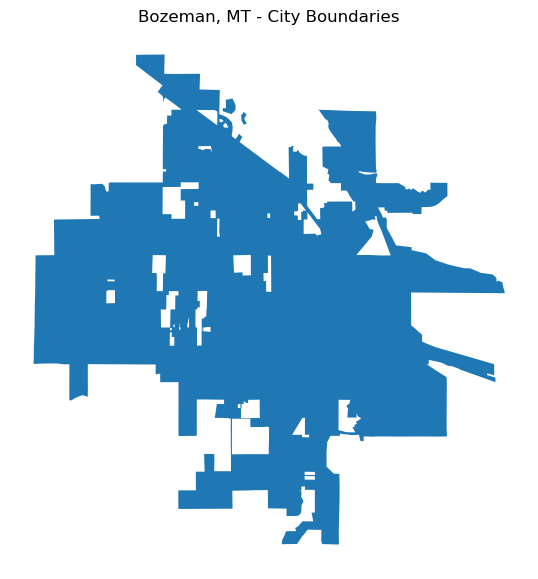

In [68]:
# Simple Plot with the axis turned off
fig, ax = plt.subplots(1, 1, figsize = (7, 7))

area.plot(ax = ax)
plt.title('Bozeman, MT - City Boundaries')
plt.axis('off');

### OSM Building Foot Prints
`OSMnx` has a ton of functionality to pull OSM data. You can read about the range of methods to use geographic information and/or place names to pull OSM data [here](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.geometries.geometries_from_place).  

Let's start with `ox.geometries_from_place` to get the building foot prints on OSM for Bozeman. To do this, we'll use OSM `tags` to subset our data request for all building types. Remember, `tags` are key-value pairs, so we use a key and then associate it with a value.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [26]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.features_from_place(place_name, tags)
print(type(buildings))
buildings.tail()

<class 'geopandas.geodataframe.GeoDataFrame'>


addr:city addr:state    building  ele gnis:county_name  \
element_type osmid                                                             
relation     12898271       NaN        NaN  apartments  NaN              NaN   
             13501711       NaN        NaN         yes  NaN              NaN   
             13501841       NaN        NaN         yes  NaN              NaN   
             14923950       NaN        NaN         yes  NaN              NaN   
             15650249       NaN        NaN         yes  NaN              NaN   

                      gnis:feature_id gnis:import_uuid name source  \
element_type osmid                                                   
relation     12898271             NaN              NaN  NaN    NaN   
             13501711             NaN              NaN  NaN    NaN   
             13501841             NaN              NaN  NaN    NaN   
             14923950             NaN              NaN  NaN    NaN   
             15650249             NaN              NaN  NaN    NaN   

                                                                geometry  ...  \
element_type osmid                                                        ...   
relation     12898271  MULTIPOLYGON (((-111.03648 45.67008, -111.0364...  ...   
             13501711  POLYGON ((-111.05477 45.68605, -111.05480 45.6...  ...   
             13501841  POLYGON ((-111.04575 45.65899, -111.04556 45.6...  ...   
             14923950  POLYGON ((-111.07904 45.72145, -111.07904 45.7...  ...   
             15650249  POLYGON ((-111.05338 45.68280, -111.05338 45.6...  ...   

                      toilets:disposal bicycle_parking unisex  \
element_type osmid                                              
relation     12898271              NaN             NaN    NaN   
             13501711              NaN             NaN    NaN   
             13501841              NaN             NaN    NaN   
             14923950              NaN             NaN    NaN   
             15650249              NaN             NaN    NaN   

                      generator:method generator:output:electricity  \
element_type osmid                                                    
relation     12898271              NaN                          NaN   
             13501711              NaN                          NaN   
             13501841              NaN                          NaN   
             14923950              NaN                          NaN   
             15650249              NaN                          NaN   

                      generator:source generator:type power  \
element_type osmid                                            
relation     12898271              NaN            NaN   NaN   
             13501711              NaN            NaN   NaN   
             13501841              NaN            NaN   NaN   
             14923950              NaN            NaN   NaN   
             15650249              NaN            NaN   NaN   

                                                    ways          type  
element_type osmid                                                      
relation     12898271  [551710046, 551710042, 551710045]  multipolygon  
             13501711           [1008279806, 1008279807]  multipolygon  
             13501841           [1008294436, 1008294437]  multipolygon  
             14923950           [1116455077, 1116455078]  multipolygon  
             15650249           [1157577971, 1157577972]  multipolygon  

[5 rows x 117 columns]

(-111.125887595, -110.982592905, 45.630245515, 45.737954985)

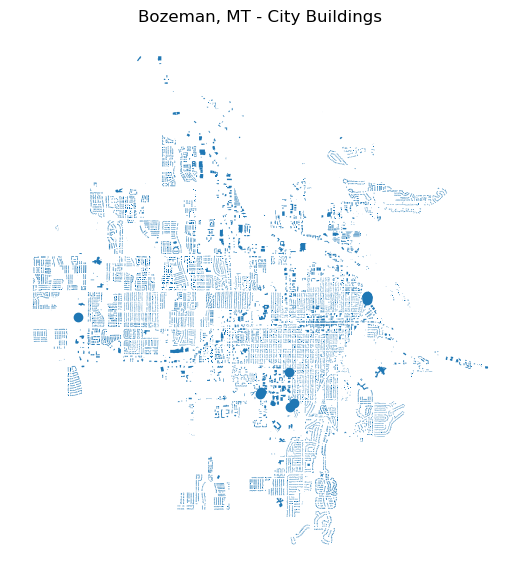

In [69]:
# Simple Plot with the axis turned off
fig, ax = plt.subplots(1, 1, figsize = (7, 7))

buildings.plot(ax = ax)
plt.title('Bozeman, MT - City Buildings')
plt.axis('off');

### Tags / Columns
Let's check out the columns that `features_from_place` returned. Notice that OSM features have a lot of tags. This can be useful, but remember that OSM data is crowd-sourced. So it is not always up-to-date nor accurate. Nonetheless, it is pretty useful.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [56]:
# print columns
for col in buildings.columns:
    print(col)

addr:city
addr:state
building
ele
gnis:county_name
gnis:feature_id
gnis:import_uuid
name
source
geometry
addr:housenumber
addr:postcode
addr:street
craft
amenity
denomination
religion
nodes
description
leisure
phone
sport
website
building:levels
roof:shape
noaddress
roof:levels
brand
brand:wikidata
addr:housename
operator
opening_hours
height
nohousenumber
layer
shop
addr:country
tourism
payment:apple_pay
payment:cash
payment:cheque
payment:contactless
payment:debit_cards
payment:google_pay
payment:visa
ref
official_name
contact:website
wheelchair
ref:walmart
branch
internet_access
alt_name
smoking
cuisine
drive_through
takeaway
office
short_name
contact:facebook
email
toilets
payment:credit_cards
brand:wikipedia
access
membership
service:bicycle:repair
service:bicycle:retail
healthcare
addr:unit
dance:teaching
healthcare:speciality
disused:name
operator:type
operator:wikidata
operator:wikipedia
image
microbrewery
clothes
disused:shop
abandoned
amenity_1
brewery
outdoor_seating
fuel:di

### MultiIndex
Pandas `DataFrames` allow you to nest both index and columns so that you can have hiarchies in your data labels. This is pretty useful, but not always intuitive. To this, Pandas uses a `MultiIndex` object to nest the columns. Here we notice that there are `element_type` and `osmid` so that each row is classified as the a high-order OSM data type (e.g. node, way, relation). 

Here we'll use `np.unique` to show the unique values for the element type.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [51]:
# Check out the index of the buildings GeoDataFraem
buildings.index

MultiIndex([(    'node',  366092859),
            (    'node',  366092860),
            (    'node',  366092867),
            (    'node',  366092869),
            (    'node',  366092883),
            (    'node', 2756761968),
            (    'node', 3905876199),
            (    'node', 5167810692),
            (    'node', 5167810693),
            (    'node', 5167810694),
            ...
            ('relation',    2046575),
            ('relation',    2046647),
            ('relation',    4076618),
            ('relation',    4076619),
            ('relation',   12006447),
            ('relation',   12898271),
            ('relation',   13501711),
            ('relation',   13501841),
            ('relation',   14923950),
            ('relation',   15650249)],
           names=['element_type', 'osmid'], length=17068)

In [52]:
# How many different 'element_type' are there?
np.unique(buildings.index.get_level_values('element_type'))

array(['node', 'relation', 'way'], dtype=object)

### Beer?
Let's subset the buildings dataset with the `brewery` and `microbrewery` tag and plot it. It looks like only brewery is Montana Ale Works and the only microbrewery is Lockhorn Cider House has been tagged as a microbrewery, which is funny, because they don't sell beer. 

In [63]:
# Subset Breweries 
breweries = buildings[buildings['brewery'].notnull()]
breweries

# Subset Micro Breweriers 
m_breweries = buildings[buildings['microbrewery'].notnull()]
m_breweries

,,addr:city,addr:state,building,ele,gnis:county_name,gnis:feature_id,gnis:import_uuid,name,source,geometry,...,toilets:disposal,bicycle_parking,unisex,generator:method,generator:output:electricity,generator:source,generator:type,power,ways,type
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
way,391843874,Bozeman,MT,yes,NaN,NaN,NaN,NaN,Lockhorn Cider House,NaN,"POLYGON ((-111.02863 45.67871, -111.02882 45.6...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


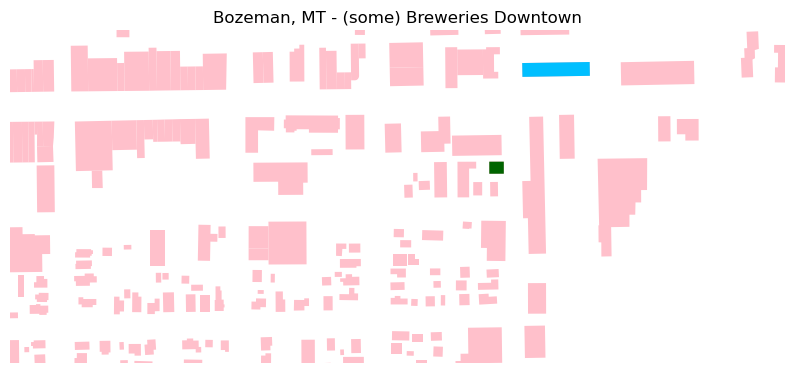

In [104]:
# Simple Plot with the axis turned off
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot All The buldings
buildings.plot(ax = ax, color = 'pink')

# Note that matplotlib has a bunch of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

# plot breweries
breweries.plot(ax = ax, color = 'deepskyblue')
m_breweries.plot(ax = ax, color = 'darkgreen')

# Zoom in by lat/long
xlim = (-111.035, -111.025) # West, East
ylim = (45.677, 45.68) # South, North 
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('Bozeman, MT - (some) Breweries Downtown')
plt.axis('off');

### On your own

See if you can create a similar map of apartments by subsetting `buildings` with the `apartments` column.

In [105]:
# Your code here

### On your own

OSM has a ton of [features](https://wiki.openstreetmap.org/wiki/Map_features#Transportation) from which you can pull data. On your own, try to extract the **bike paths** for Bozeman, MT. From the OSM [documentation](https://wiki.openstreetmap.org/wiki/Highways) on `highway`:

>"Note that in North American and Australian English, the term highway frequently implies a major road such as a controlled-access highway or an arterial road. Don't let that confuse you, the term is used with its British English meaning within OSM."

In [109]:
# List key-value pairs for tags
tags = {'highway': True}   

roads = ox.features_from_place(place_name, tags)
print(type(roads))
roads.tail()

<class 'geopandas.geodataframe.GeoDataFrame'>


geometry  \
element_type osmid                                                           
way          1250913619  LINESTRING (-111.04666 45.68607, -111.04666 45...   
             1250913620  LINESTRING (-111.04613 45.68668, -111.04575 45...   
             1250913627  LINESTRING (-111.07471 45.71052, -111.07520 45...   
             1250913628  LINESTRING (-111.07471 45.71030, -111.07520 45...   
             1250913629  LINESTRING (-111.07471 45.71030, -111.07421 45...   

                         highway  ref railway source direction  \
element_type osmid                                               
way          1250913619  service  NaN     NaN    NaN       NaN   
             1250913620  service  NaN     NaN    NaN       NaN   
             1250913627  service  NaN     NaN    NaN       NaN   
             1250913628  service  NaN     NaN    NaN       NaN   
             1250913629  service  NaN     NaN    NaN       NaN   

                        traffic_signals junction crossing  \
element_type osmid                                          
way          1250913619             NaN      NaN      NaN   
             1250913620             NaN      NaN      NaN   
             1250913627             NaN      NaN      NaN   
             1250913628             NaN      NaN      NaN   
             1250913629             NaN      NaN      NaN   

                        traffic_signals:direction  ... golf golf_cart  \
element_type osmid                                 ...                  
way          1250913619                       NaN  ...  NaN       NaN   
             1250913620                       NaN  ...  NaN       NaN   
             1250913627                       NaN  ...  NaN       NaN   
             1250913628                       NaN  ...  NaN       NaN   
             1250913629                       NaN  ...  NaN       NaN   

                        ramp:wheelchair mtb:scale trail_visibility smoothness  \
element_type osmid                                                              
way          1250913619             NaN       NaN              NaN        NaN   
             1250913620             NaN       NaN              NaN        NaN   
             1250913627             NaN       NaN              NaN        NaN   
             1250913628             NaN       NaN              NaN        NaN   
             1250913629             NaN       NaN              NaN        NaN   

                        informal lanes:backward lanes:forward area  
element_type osmid                                                  
way          1250913619      NaN            NaN           NaN  NaN  
             1250913620      NaN            NaN           NaN  NaN  
             1250913627      NaN            NaN           NaN  NaN  
             1250913628      NaN            NaN           NaN  NaN  
             1250913629      NaN            NaN           NaN  NaN  

[5 rows x 103 columns]

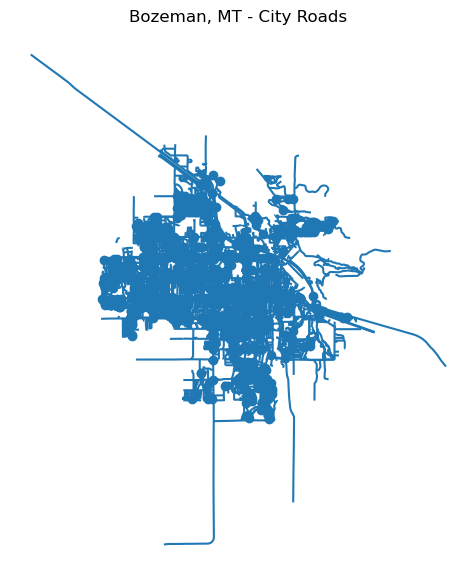

In [111]:
# Simple Plot with the axis turned off
fig, ax = plt.subplots(1, 1, figsize = (7, 7))

roads.plot(ax = ax)
plt.title('Bozeman, MT - City Roads')
plt.axis('off');

In [105]:
# Your code here